In [105]:
### Encoding categorical variables
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [106]:
ca_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [107]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [108]:
ca_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [109]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = np.number)

In [110]:
ca_df["education"].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [111]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [112]:
from sklearn.preprocessing import OrdinalEncoder

In [113]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor","Master", "Doctor"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

<ipython-input-113-c2d63f1cbcc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])
<ipython-input-113-c2d63f1cbcc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])
<ipython-input-113-c2d63f1cbcc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [114]:
ordinals

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
...,...,...,...
10905,2.0,2.0,1.0
10906,0.0,1.0,1.0
10907,1.0,2.0,1.0
10908,2.0,1.0,1.0


In [115]:
nominals = pd.get_dummies(nominals)

In [116]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


### Numericals

In [117]:
numericals = ca_df.select_dtypes(include='number')
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [118]:
#dropping nas
numericals = numericals.dropna()

In [119]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [120]:
#dropping duplicates
numericals = numericals.drop_duplicates()

In [121]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

### CONCAT

In [122]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [123]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

### dropping nans

In [159]:
final_df.dropna(inplace=True)

### Lab instructions : 

1) Compute R2 for the first model iteration + feature importance plot
2) Run the 2nd iteration of the model, adding the categorical data

### X-y Split

In [160]:
X = final_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A']]
y = final_df[["total_claim_amount"]]

### Train test split

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [164]:
#Standardize the data (after the data split!).

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [165]:
X_test = scaler.transform(X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F574AACFD0>]],
      dtype=object)

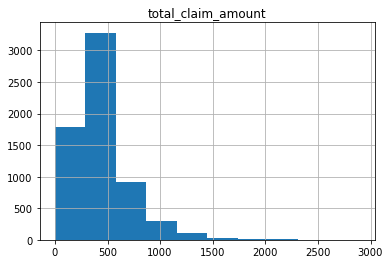

In [166]:
y_train.hist()

In [167]:
pt = PowerTransformer()

In [168]:
pt.fit(y_train)
y_train = pt.transform(y_train)

In [169]:
y_test = pt.transform(y_test)

### Model Training

In [171]:
from sklearn.linear_model import LinearRegression

In [172]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [173]:
model.coef_

array([[-1.03312777e-02, -2.15882230e-01,  3.20910413e+00,
        -6.38780041e-02, -6.83689618e-02, -2.59349705e-01,
         2.38751140e-02,  8.24957152e-02,  6.95919768e-02,
        -4.19721760e-02, -1.20871365e-01, -1.43203176e+12,
        -1.43203176e+12, -1.43203176e+12, -1.43203176e+12,
        -1.43203176e+12, -1.23618889e+13, -1.23618889e+13,
        -7.90661659e+12, -7.90661659e+12, -7.90661659e+12,
        -7.90661659e+12, -7.90661659e+12, -2.16756906e+12,
        -2.16756906e+12, -8.65894938e+12, -8.65894938e+12,
        -8.65894938e+12,  3.70824975e+12,  3.70824975e+12,
         3.70824975e+12, -9.33251011e+12, -3.97209685e+11,
        -5.05932594e+12,  1.50345048e+12,  1.50345048e+12,
         1.50345048e+12, -7.43184995e+12, -7.43184995e+12,
        -7.43184995e+12, -2.76973369e+12, -2.76973369e+12,
        -2.76973369e+12, -8.10434889e+10, -8.10434889e+10,
        -8.10434889e+10, -8.10434889e+10,  2.69152050e+12,
         2.69152050e+12,  2.69152050e+12,  2.69152050e+1

In [174]:
model.intercept_

array([3.26858283e+13])

### Predict total claim amount

In [176]:
random_claim = pd.DataFrame(X_test).sample()

In [177]:
random_claim

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
1630,0.042816,0.837049,0.037975,0.6,0.10101,0.4,0.875,0.0,0.0,0.25,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
model.predict(random_claim)

array([[-0.828125]])

In [179]:
pt.inverse_transform(model.predict(random_claim))

array([[188.09430385]])

### Create predictions for test set

In [181]:
y_pred = model.predict(X_test)

In [206]:
# inverse transforming predictions

In [208]:
pt.inverse_transform(y_pred)

array([[646.5494825 ],
       [426.84070933],
       [424.54768882],
       ...,
       [180.08623636],
       [438.40639294],
       [ 61.14830492]])

In [182]:
y_pred = pd.DataFrame(y_pred)

In [186]:
y_test = pd.DataFrame(y_test)

In [187]:
y_test = y_test.reset_index(drop=True)

In [188]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [192]:
residuals_df.columns = ["y_test","y_pred"]

In [193]:
residuals_df

,y_test,y_pred
0,0.165285,0.828125
1,0.014128,0.164062
2,-0.146564,0.156250
3,0.142178,0.375000
4,0.142038,0.273438
...,...,...
2147,0.864817,0.902344
2148,0.947189,0.535156
2149,-0.402655,-0.871094
2150,0.235706,0.203125


In [194]:
residuals_df["residuals"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [195]:
residuals_df

,y_test,y_pred,residuals
0,0.165285,0.828125,-0.662840
1,0.014128,0.164062,-0.149934
2,-0.146564,0.156250,-0.302814
3,0.142178,0.375000,-0.232822
4,0.142038,0.273438,-0.131400
...,...,...,...
2147,0.864817,0.902344,-0.037527
2148,0.947189,0.535156,0.412032
2149,-0.402655,-0.871094,0.468438
2150,0.235706,0.203125,0.032581


### Calculating metrics

In [196]:
mean_error = residuals_df["residuals"].mean()

In [197]:
mean_error

0.0028203276830403266

In [198]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [199]:
mse(y_test,y_pred)

0.2040953822620518

In [200]:
mae(y_test,y_pred)

0.3481975934569908

In [201]:
rmse = mse(y_test,y_pred, squared = False)
rmse

0.4517691692247843

In [202]:
from sklearn.metrics import r2_score

### Computing R2_score for test_set

In [203]:
round(r2_score(y_test, y_pred),2)

0.8

### Computing R2_score_for_train_set

In [204]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [205]:
r2_score(y_train,y_pred_train)

0.8084084552142655

In [215]:
feature_names = list(X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [210]:
coefficients = model.coef_

In [211]:
coefficients = [i for i in coefficients[0]]

In [212]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

NameError: name 'feature_names' is not defined

In [213]:
import seaborn as sns
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = fi_df_sorted["name"], x = fi_df_sorted["coeff"])

NameError: name 'fi_df' is not defined

In [214]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

sns.barplot(x = fi_df["name"],y =fi_df["coeff"])

NameError: name 'fi_df' is not defined

<Figure size 1440x576 with 0 Axes>

In [ ]:
X_train["location_code_Suburban"].describe()